In [1]:
#import splinter , beautifulsoup and webdriver_manager
from splinter import Browser
#If you do not need to click on the website to go to the next page
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser ('chrome', **executable_path, headless = False)

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/hector/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


### SERVERS USERS

In [3]:
#website
url= 'https://www.businessofapps.com/data/netflix-statistics/'
#visit the website
browser.visit(url)
html= browser.html

In [4]:
soup=BeautifulSoup(html,'html.parser')

In [5]:
table= soup.find_all('table')[2]
#Table_=table.text
table
Table_different_servers_sub_df=pd.read_html(str(table))
Table_different_servers_sub_df
Dif_servers=Table_different_servers_sub_df[0]
Dif_servers.head(10)

,0,1,2
0,"Netflix users vs other streaming services, global","Netflix users vs other streaming services, global","Netflix users vs other streaming services, global"
1,Service,"Subscribers, millions",Date figure pulled
2,Netflix,204,Jan-21
3,Amazon Prime,150,Jan-20
4,Disney Plus,87,Dec-20
5,Hulu,39,Dec-20
6,HBO Max,38,Jan-21
7,Peacock,33,Jan-21
8,CBS All Access/Paramount+*,18,Nov-20
9,Curiosity Stream,13,Jun-20


In [6]:
#Dif_servers_df=Dif_servers.drop(columns=[0,1,2])
Dif_servers_df=Dif_servers.rename(columns={0:'Stream Service', 1:'Millions of Users'})
Dif_servers_c=Dif_servers_df.drop(columns=[2])
Dif_servers_clean=Dif_servers_c.drop([0,1,4,5,7,8,9,10])
Dif_servers_clean.head(3)

,Stream Service,Millions of Users
2,Netflix,204
3,Amazon Prime,150
6,HBO Max,38


In [7]:
#convert object column to integer
Dif_servers_clean['Millions of Users']=Dif_servers_clean['Millions of Users'].astype(str).astype(int)
#Dif_servers_clean['Stream Service']=Dif_servers_clean['Stream Service'].astype(str).astype(int)
Dif_servers_clean.dtypes


Stream Service       object
Millions of Users     int64
dtype: object

In [8]:
Dif_servers_clean.reset_index(drop=True)
Dif_servers_clean.set_index('Stream Service')

,Millions of Users
Stream Service,
Netflix,204
Amazon Prime,150
HBO Max,38


Text(0.5, 1.0, 'Users at Netflix, Amazon Prime, HBO')

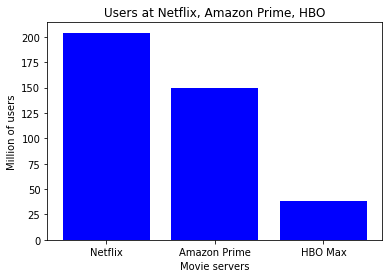

In [9]:
#Graph showing the number of users from the different servers
y_axis=Dif_servers_clean['Millions of Users']
x_axis=Dif_servers_clean['Stream Service']

plt.bar(x_axis, y_axis, color='b')
plt.xlabel('Movie servers')
plt.ylabel("Million of users")
plt.title('Users at Netflix, Amazon Prime, HBO')


### NETFLIX EVOLUTION OVER THE TIME

In [10]:
table= soup.find_all('table')[1]
#Table_=table.text
table
Table_netflix_sub_df=pd.read_html(str(table))
Netflix_users=Table_netflix_sub_df[0]
Netflix_users.head(3)

,0,1
0,Netflix users (paying subscribers) by quarter,Netflix users (paying subscribers) by quarter
1,Quarter,"Netflix users, millions"
2,Q3 2011,21.5


In [11]:
N=Netflix_users[[0,1]].drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
Netflix_clean=N.rename(columns={0:'Quarter', 1:'Millions of Users'})
Netflix_clean.dtypes

Quarter              object
Millions of Users    object
dtype: object

In [12]:
#change data type for netflix evolution
Netflix_clean['Millions of Users']=Netflix_clean['Millions of Users'].astype(str).astype(float)
Netflix_clean.dtypes

Quarter               object
Millions of Users    float64
dtype: object

Text(0.5, 1.0, 'Netflix Evolution Over the Time')

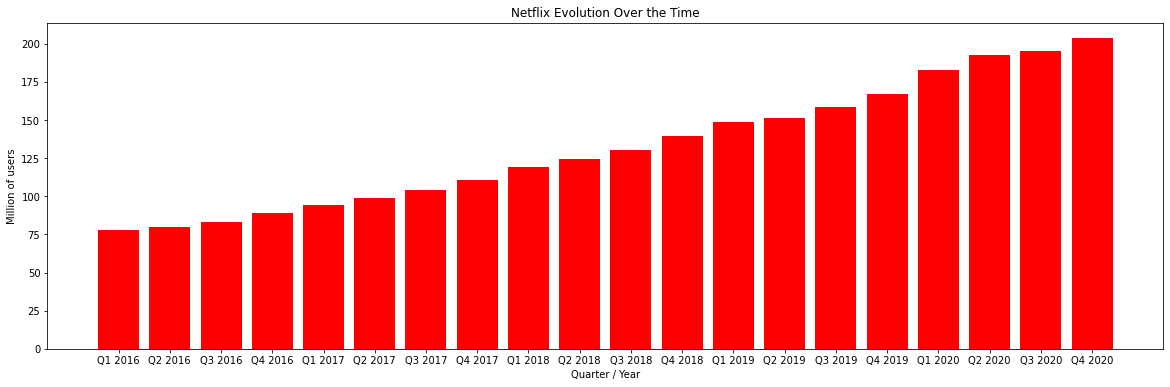

In [13]:
#Graph showing the number of users from the different servers
y_axis=Netflix_clean['Millions of Users']
x_axis=Netflix_clean['Quarter']

plt.figure(figsize=(20,6))
plt.bar(x_axis, y_axis, color='r')
plt.xlabel('Quarter / Year')
plt.ylabel("Million of users")
plt.title('Netflix Evolution Over the Time')

### netflix worlwide

In [14]:
table= soup.find_all('table')[5]
#Table_=table.text
table
Table_A=pd.read_html(str(table))
Users_by_country=Table_A[0]
Users_by_country.head(4)
#Dif_servers=Table_different_servers_sub_df[0]

,0,1
0,Netflix users by country*,Netflix users by country*
1,Country,"Netflix subscribers, millions"
2,US,63.1
3,Brazil,16.4


In [28]:
#Dif_servers_df=Dif_servers.drop(columns=[0,1,2])
Users_by_country=Users_by_country.rename(columns={0:'Netflix Users By Country', 1:'Netflix Millions of Users'})
Users_by_country.head(2)

,Netflix Users By Country,Netflix Millions of Users
0,Netflix users by country*,Netflix users by country*
1,Country,"Netflix subscribers, millions"


In [31]:
Users_by_country= Users_by_country.drop([0,1])
Users_by_country.head(2)

,Netflix Users By Country,Netflix Millions of Users
2,US,63.1
3,Brazil,16.4


In [32]:
Users_by_country.reset_index(drop=True)
Users_by_country.set_index('Netflix Users By Country')
Users_by_country.head(3)

,Netflix Users By Country,Netflix Millions of Users
2,US,63.1
3,Brazil,16.4
4,UK,14.8


In [33]:
pd.to_numeric(Users_by_country['Netflix Millions of Users'])

2     63.1
3     16.4
4     14.8
5      7.6
6      7.4
7      7.3
8      6.8
9      6.0
10     4.9
11     3.7
12     3.4
13     3.3
14     3.2
15     3.0
16     2.4
17     2.4
18     2.3
19     1.7
20     1.1
21     0.9
22     0.8
23     0.4
24     0.3
Name: Netflix Millions of Users, dtype: float64

Text(0.5, 1.0, 'Netflix Worldwide')

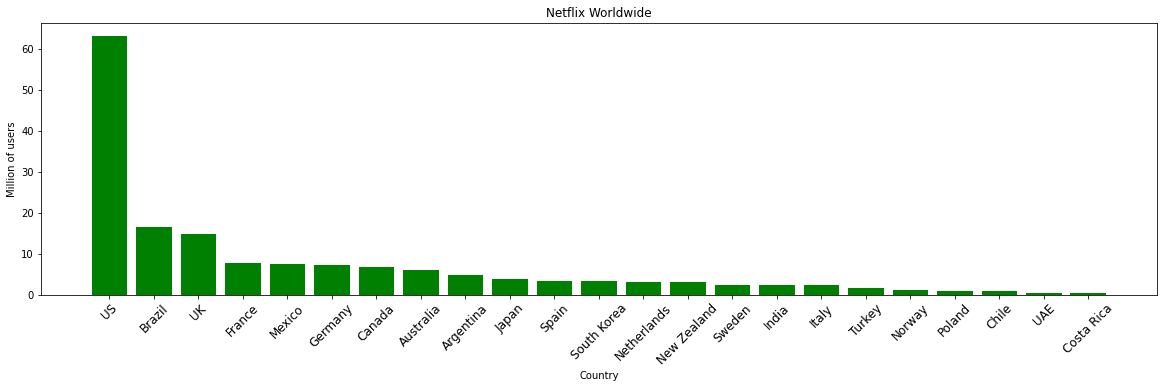

In [35]:
#Graph showing the number of users from the different servers
y_axis=Users_by_country['Netflix Millions of Users']
x_axis=Users_by_country['Netflix Users By Country']

plt.figure(figsize=(20,5))
plt.bar(x_axis, y_axis, color='g')
plt.xticks(fontsize=12)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel("Million of users")
plt.title('Netflix Worldwide')

### NUMBER OF MOVIES PER SERVER

In [58]:
table_content= soup.find_all('table')[15]
#Table_=table.text
table_content
Table_content=pd.read_html(str(table))
Table_content=Table_content[0]
Table_Movies=Table_content.drop([0,4,5,7,1])


In [65]:
Table_Movies_Clean=Table_Movies.drop(columns=[2])



In [73]:
Table_Movies_Clean=Table_Movies_Clean.rename(columns={0:'Stream Service', 1:'Movies'})

In [74]:
Table_Movies_Clean.dtypes

Stream Service    object
Movies            object
dtype: object

In [75]:
pd.to_numeric(Table_Movies_Clean['Movies'])

2     3579
3    25792
6     1882
Name: Movies, dtype: int64

In [81]:
Table_Movies_Clean.reset_index(drop=True)

,Stream Service,Movies
0,Netflix,3579
1,Amazon,25792
2,HBO Max,1882
